### Name: Shriya Bhat
### Batch: A1
### Week-1(CartPole-v0)

In [1]:
pip install -U gym

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pygame

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install gym[classic_control]

Note: you may need to restart the kernel to use updated packages.


In [4]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Initialize the environment
env = gym.make('CartPole-v0')

C:\Users\Shriya Bhat\anaconda3\Lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


# CartPole-v0 Environment Task

## Problem Overview

The **CartPole-v0** environment is a classic control problem in reinforcement learning. The goal of the agent is to balance a pole attached to a cart, which moves along a track. The agent controls the movement of the cart and aims to keep the pole upright.

### Key Components of the CartPole-v0 Environment:
- **State Space**: The environment's state is represented by four variables:
  1. Cart position
  2. Cart velocity
  3. Pole angle
  4. Pole velocity at the tip
- **Action Space**: The agent can take one of two actions:
  1. Move the cart to the left.
  2. Move the cart to the right.
- **Reward System**: The agent receives a positive reward (usually +1) for every step that the pole remains balanced. If the pole falls, the episode ends, and no more rewards are earned.


## Steps to Implement:

### 1. Implement the CartPole Environment for a Certain Number of **Steps**
   - This task involves running the simulation for a fixed number of **steps** within a single episode. Each step corresponds to an action taken by the agent.
   - **Steps** mean a set number of actions, and once this number is reached or of pole falls, the episode will end. 



In [6]:
def run_for_steps(env, num_steps=1000):
    
    state = env.reset()  
    total_reward = 0  
    rewards_per_step = []     
   
    for step in range(num_steps):
        action = env.action_space.sample()  
        next_state, reward, done, _, _ = env.step(action)  
        total_reward += reward  
        rewards_per_step.append(total_reward)  
        
        if done:
            break  
    
    
    return total_reward, rewards_per_step, step + 1  

### 2. Implement the CartPole Environment for a Certain Number of **Episodes**
   - An **episode** is a complete run of the environment, starting from the beginning and continuing until the pole falls or the maximum step limit (typically 200) is reached.
   - You need to run the environment for a set number of **episodes**. Each episode will be independent, meaning it starts fresh and ends when the pole falls or after 200 steps.(If the agent balances the pole for 200 steps in the first episode, the episode ends with a total reward of 200.)



In [7]:
def run_for_episodes(env, num_episodes=10):
    
    rewards_per_episode = []  
    cumulative_rewards = []  
    
    for episode in range(num_episodes):
        state = env.reset()  
        total_reward = 0  
        
        while True:
            action = env.action_space.sample()  
            next_state, reward, done, _, _ = env.step(action)  
            total_reward += reward  # 
            
            if done:
                rewards_per_episode.append(total_reward)  
                cumulative_rewards.append(np.sum(rewards_per_episode))  
                break  
    
    
    return rewards_per_episode, cumulative_rewards

### 3. Compare and Comment on the Rewards Earned for Both Approaches
   - After running the environment using both the **steps-based** and **episodes-based** approaches, you will compare the **total rewards** accumulated in each case.
   - **Reward Mechanism**:
     - The agent earns a reward of **+1** for each step where the pole is balanced.
     - If the pole falls, the episode ends, and no additional rewards are earned.
   - Compare the rewards for running for a number of **steps** versus running for a number of **episodes**:
     - Does running for more episodes yield higher rewards?
     - Does focusing on a specific number of steps affect the agent’s performance?



In [8]:

num_steps = 1000
total_reward_steps, rewards_per_step, actual_steps = run_for_steps(env, num_steps)

C:\Users\Shriya Bhat\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [9]:

num_episodes = 10
rewards_per_episode, cumulative_rewards_episodes = run_for_episodes(env, num_episodes)

In [10]:

print("Reward for each episode:")
for i, reward in enumerate(rewards_per_episode, 1):
    print(f"Episode {i}: {reward}")

Reward for each episode:
Episode 1: 19.0
Episode 2: 18.0
Episode 3: 17.0
Episode 4: 58.0
Episode 5: 13.0
Episode 6: 32.0
Episode 7: 15.0
Episode 8: 9.0
Episode 9: 14.0
Episode 10: 40.0


In [11]:
print(f"\nTotal reward for {num_episodes} episodes: {sum(rewards_per_episode)}")


Total reward for 10 episodes: 235.0


In [12]:

print(f"\nTotal reward for {num_steps} steps: {total_reward_steps}")


Total reward for 1000 steps: 13.0


### 4. Plot the Cumulative Reward
   - After completing both approaches (steps-based and episodes-based), track the **cumulative reward** over time.
   - The **cumulative reward** reflects how well the agent is performing as it learns to keep the pole balanced. This will provide insights into the agent's learning progress.
   - Use a plot to visualize the cumulative rewards for each approach over time and compare the learning performance.



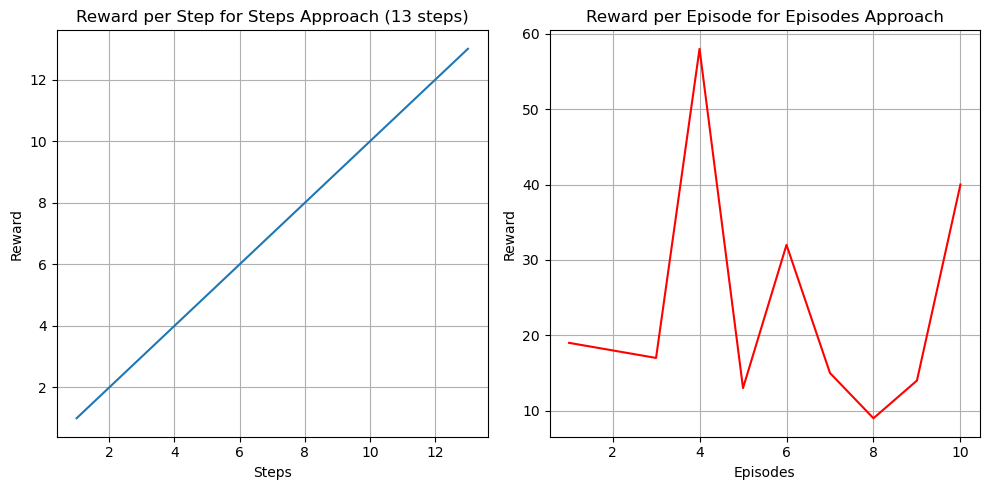

In [13]:

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.plot(np.arange(1, actual_steps + 1), rewards_per_step, label='Reward per Step')
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title(f'Reward per Step for Steps Approach ({actual_steps} steps)')
plt.grid()


plt.subplot(1, 2, 2)
plt.plot(np.arange(1, num_episodes + 1), rewards_per_episode, label='Reward per Episode', color='r')
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Reward per Episode for Episodes Approach')
plt.grid()

plt.tight_layout()
plt.show()


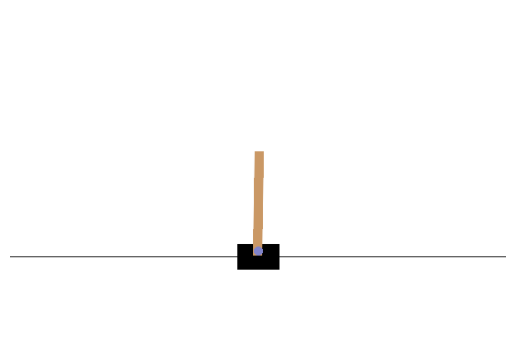

In [14]:

env = gym.make('CartPole-v1', render_mode='rgb_array')
obs, info = env.reset()
env_screen = env.render()
plt.imshow(env_screen)
plt.axis('off')  # Turn off axis
plt.show()


env.close()


## WEEK-1(MountainCar-v0 env)

In [15]:
env1 = gym.make('MountainCar-v0')

In [16]:
obs_space = env1.observation_space
action_space = env1.action_space
print("The observation space: {}".format(obs_space))
print("The action space: {}".format(action_space))

The observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
The action space: Discrete(3)


In [17]:
env = gym.make('MountainCar-v0', render_mode='human')

In [18]:
env.close()

In [19]:
env = gym.make('MountainCar-v0', render_mode='rgb_array')

In [20]:
# Reset the environment
obs, info = env.reset()  # Calling reset() returns the initial observation and info

In [21]:
# Render the environment after reset
env_screen = env.render()  # This will capture the screen in 'rgb_array' mode

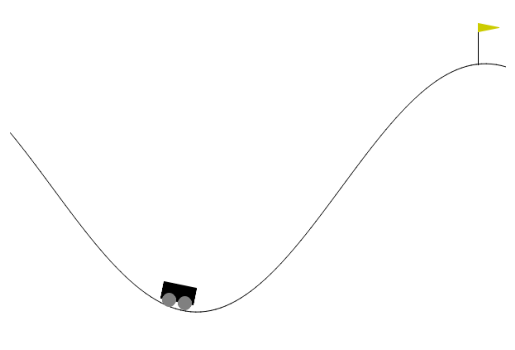

In [22]:
# Optionally, visualize the environment screen (e.g., with matplotlib)
plt.imshow(env_screen)
plt.axis('off')  # Turn off axis
plt.show()

In [23]:
env.close()

### a. Implement the Mountain Car environment for a certain number of steps 

In [24]:
def run_for_steps(env1, num_steps=1000):
    """
    Run the MountainCar environment for a fixed number of steps.
    Each step corresponds to an action in the environment.
    The environment may terminate early if the car reaches the goal.
    """
    state = env1.reset()  # Reset environment to initial state
    total_reward = 0  # Initialize total reward
    rewards_per_step = []  # List to keep track of cumulative reward per step
    
    # Loop through the number of steps
    for step in range(num_steps):
        action = env1.action_space.sample()  # Sample a random action (0: left, 1: no action, 2: right)
        next_state, reward, done, _, _ = env1.step(action)  # Take action in environment
        total_reward += reward  # Add reward to the total
        rewards_per_step.append(total_reward)  # Append the cumulative reward at this step
        
        if done:
            break  # End the episode if the car reaches the goal
    
    # Return total reward and rewards per step for plotting
    return total_reward, rewards_per_step, step + 1  # Return actual steps taken

### b. Implement the Mountain Car environment for a certain number of episodes

In [25]:
def run_for_episodes(env1, num_episodes=10):
    """
    Run the MountainCar environment for a fixed number of episodes.
    Each episode starts from a reset state and continues until the car reaches the goal.
    """
    rewards_per_episode = []  # List to store reward for each episode
    cumulative_rewards = []  # List to store cumulative rewards across episodes
    
    for episode in range(num_episodes):
        state = env1.reset()  # Reset environment at the start of each episode
        total_reward = 0  # Initialize total reward for this episode
        
        while True:
            action = env1.action_space.sample()  # Sample a random action
            next_state, reward, done, _, _ = env1.step(action)  # Take action in environment
            total_reward += reward  # Add reward to total reward for this episode
            
            if done:
                rewards_per_episode.append(total_reward)  # Store total reward for this episode
                cumulative_rewards.append(np.sum(rewards_per_episode))  # Store cumulative reward
                break  # End episode if car reaches the goal
    
    # Return rewards for each episode and cumulative rewards for plotting
    return rewards_per_episode, cumulative_rewards

### c. Compare and comment on the rewards earned for both approaches.

In [26]:
# Run for fixed steps
num_steps = 1000
total_reward_steps, rewards_per_step, actual_steps = run_for_steps(env1, num_steps)

In [27]:
# Run for fixed episodes
num_episodes = 10
rewards_per_episode, cumulative_rewards_episodes = run_for_episodes(env1, num_episodes)

In [28]:
# Print individual episode rewards and total reward for episodes approach
print("Reward for each episode:")
for i, reward in enumerate(rewards_per_episode, 1):
    print(f"Episode {i}: {reward}")

Reward for each episode:
Episode 1: -9544.0
Episode 2: -44772.0
Episode 3: -14143.0
Episode 4: -22574.0
Episode 5: -26946.0
Episode 6: -30200.0
Episode 7: -18147.0
Episode 8: -18528.0
Episode 9: -23331.0
Episode 10: -14843.0


In [29]:
print(f"\nTotal reward for {num_episodes} episodes: {sum(rewards_per_episode)}")


Total reward for 10 episodes: -223028.0


In [30]:
# Print the total reward for the steps approach
print(f"\nTotal reward for {num_steps} steps: {total_reward_steps}")


Total reward for 1000 steps: -1000.0


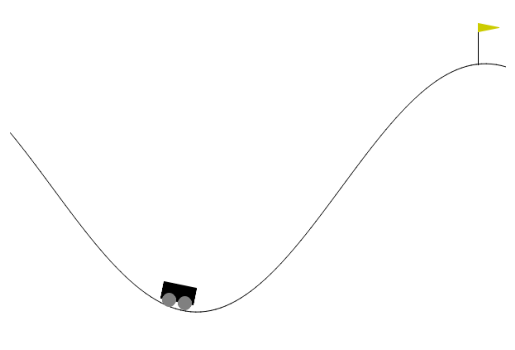

In [31]:
plt.imshow(env_screen)
plt.axis('off')  # Turn off axis
plt.show()

### d. Plot the cumulative reward of the games and note down the results.

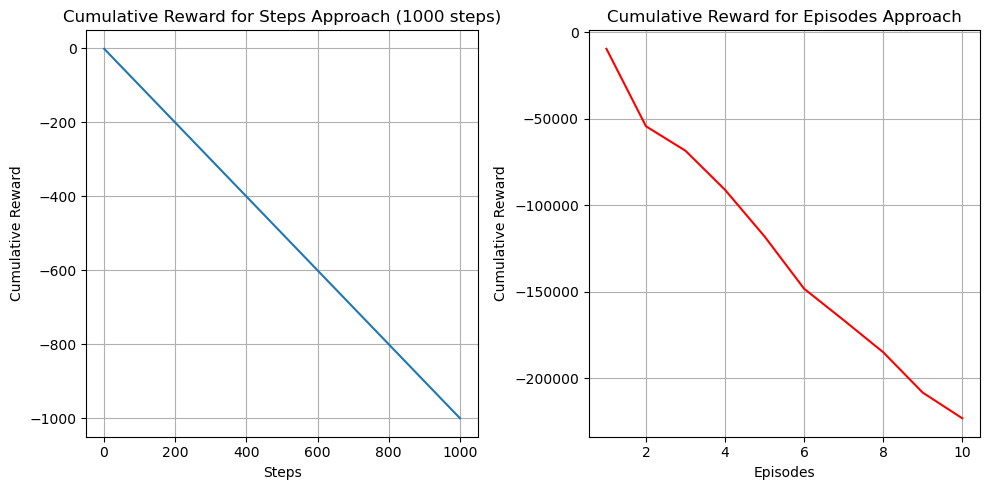

In [32]:
# Plotting the cumulative rewards
plt.figure(figsize=(10, 5))

# Plot for steps approach
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, actual_steps + 1), rewards_per_step, label='Cumulative Reward')
plt.xlabel('Steps')
plt.ylabel('Cumulative Reward')
plt.title(f'Cumulative Reward for Steps Approach ({actual_steps} steps)')
plt.grid()

# Plot for episodes approach
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, num_episodes + 1), cumulative_rewards_episodes, label='Cumulative Reward', color='r')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward for Episodes Approach')
plt.grid()

plt.tight_layout()
plt.show()

- In the **steps approach**, the agent is restricted to a fixed number of steps, which might be insufficient to build momentum or escape the valley, leading to negative rewards as it fails to reach a stable position.

- On the other hand, the **episodes approach** allows multiple iterations (e.g., 10 episodes), each with a set number of steps. This increases the chances of exploring better strategies. Although initial rewards may still be negative, the overall trend improves over iterations, with some episodes achieving positive rewards. This makes the episodes-based approach more reliable than the steps-based one.